<a href="https://colab.research.google.com/github/a-proenca/LAD/blob/main/LAD_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Laboratório de Análise de Dados
## Elaborado por:

# André Proença - 2016018783

# Bruno Coutinho - 2014009997

#Imports

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#FUNCOES


In [3]:
def ler_emel():
    emel_filepath = '/content/drive/MyDrive/LAD_2023/EMEL'
    ficheiros = ['EMEL_CONDICIONAMENTOS_TRANSITO_2022.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(emel_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_eixos_vodafone():
    #Nao incluimos fevereiro nem março tem dados em falta
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2022'
    ficheiros = ['PGIL_VODAFONE_EIXOS_2022_01.csv','PGIL_VODAFONE_EIXOS_2022_04.csv','PGIL_VODAFONE_EIXOS_2022_05.csv','PGIL_VODAFONE_EIXOS_2022_06.csv','PGIL_VODAFONE_EIXOS_2022_07.csv','PGIL_VODAFONE_EIXOS_2022_08.csv','PGIL_VODAFONE_EIXOS_2022_09.csv','PGIL_VODAFONE_EIXOS_2022_10.csv','PGIL_VODAFONE_EIXOS_2022_11.csv','PGIL_VODAFONE_EIXOS_2022_12.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_quadriculas_vodafone_bruto():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE_QUADRICULAS'
    ficheiros = ['VODAFONE_QUADRICULAS_BRUTO_UTF8.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_abril.csv', 'grelhas_maio.csv', 'grelhas_junho.csv', 'grelhas_julho.csv', 'grelhas_agosto.csv', 'grelhas_setembro.csv', 'grelhas_outubro.csv', 'grelhas_novembro.csv', 'grelhas_dezembro.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone_paco():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_outubro_paco.csv', 'grelhas_novembro_paco.csv', 'grelhas_dezembro_paco.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result



def ler_waze():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/WAZE JAMS'
    ficheiros = ['waze_2022_ate_2022-07-18.csv','waze_2022_desde_2022-07-18.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def plot_outlier_detection(df, column_name):

    # boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[column_name])
    plt.title(f'Boxplot para Detecção de Outliers em {column_name}')
    plt.ylabel('Valores')
    plt.show()

    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name])
    plt.title(f'Scatter Plot para Detecção de Outliers em {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')

    # Calculando o limite superior e inferior para outliers (exemplo: 1.5*IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    plt.hlines([limite_superior, limite_inferior], xmin=df.index.min(), xmax=df.index.max(), colors='r')
    plt.show()

def plot_histogram_with_count(df, x_column):
     # Hist
    sns.histplot(data=df, x=x_column, stat='count')
    plt.title(f'Histograma de Contagem para {x_column}')
    plt.xlabel(x_column)
    plt.ylabel('Contagem')
    plt.show()

#FUNCAO FOI USADA PREVIAMENTE PARA FILTRAR AS HORAS DE PONTA E TORNAR OS FICHEIROS MAIS
def filtrar_horas(df, coluna_datetime):
    """
    Filtra um DataFrame para manter apenas as linhas onde os horários em 'coluna_datetime'
    estão entre 7-10 da manhã e 17-20h.

    Parâmetros:
    df (pandas.DataFrame): DataFrame a ser filtrado.
    coluna_datetime (str): Nome da coluna que contém os dados de data e hora.

    Retorna:
    pandas.DataFrame: DataFrame filtrado.
    """
    # Garantir que a coluna Datetime está no formato correto
    df[coluna_datetime] = pd.to_datetime(df[coluna_datetime])

    # Filtrar para manter as horas entre 7-10 da manhã e 17-20h
    df_filtrado = df[((df[coluna_datetime].dt.hour >= 7) & (df[coluna_datetime].dt.hour < 10)) |
                     ((df[coluna_datetime].dt.hour >= 17) & (df[coluna_datetime].dt.hour < 20))]

    return df_filtrado

def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return None


In [4]:
#data_emel = ler_emel()
#data_waze = ler_waze()
#data_paco = ler_grelhas_vodafone_paco()
data_vodafone_eixos = ler_eixos_vodafone()
#data_vodafone_grelhas = ler_grelhas_vodafone()
#data_quadriculas_vodafone_bruto = ler_quadriculas_vodafone_bruto()

In [5]:
#converter valores em datetime
data_vodafone_eixos['Datetime'] = pd.to_datetime(data_vodafone_eixos['Datetime'], format='%Y.%m.%d %H:%M:%S')
#data_paco['Datetime'] = pd.to_datetime(data_paco['Datetime'], format='%Y.%m.%d %H:%M:%S')
#data_vodafone_grelhas['Datetime'] = pd.to_datetime(data_vodafone_grelhas['Datetime'], format='%d.%m.Y %H:%M:%S')

In [6]:
#Remove data e filtrar horas de ponta apenas
remove_cols = ['extract_year_2', 'extract_month_3', 'extract_day_4', 'id_eixo_viario']
data_vodafone_eixos = data_vodafone_eixos.drop(columns=remove_cols)
data_vodafone_eixos = filtrar_horas(data_vodafone_eixos, 'Datetime')

Feature Engineering e Encoders

In [7]:
#Voltar a meter mes e dia para nao dar erro
data_vodafone_eixos['Month'] = data_vodafone_eixos['Datetime'].dt.month
data_vodafone_eixos['Day'] = data_vodafone_eixos['Datetime'].dt.day
data_vodafone_eixos['Weekday'] = data_vodafone_eixos['Datetime'].dt.day_name()

data_vodafone_eixos['Weekday'] = data_vodafone_eixos['Weekday'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})


data_vodafone_eixos['Season'] = data_vodafone_eixos['Month'].apply(month_to_season)

# Criando um mapeamento para o encoding das estações do ano
seasons_encoding = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}

# Aplicar o encoding ao DataFrame para criar a coluna 'Season_Encoded'
data_vodafone_eixos['Season_Encoded'] = data_vodafone_eixos['Season'].map(seasons_encoding)

data_vodafone_eixos['Season'] = data_vodafone_eixos['Month'].apply(month_to_season)

data_vodafone_eixos = data_vodafone_eixos.drop(columns='Season')

In [8]:
data_vodafone_eixos

,Eixo,Datetime,C12,C13,Month,Day,Weekday,Season_Encoded
28,N117 (Cabos Ávila),2022-01-01 08:20:00+00:00,35.310001,23.950001,1,1,6,4
29,N117 (Cabos Ávila),2022-01-01 08:25:00+00:00,65.620003,82.110001,1,1,6,4
30,IC16,2022-01-01 08:25:00+00:00,0.000000,0.000000,1,1,6,4
31,A36 (Túnel do Grilo),2022-01-01 08:25:00+00:00,24.450001,0.000000,1,1,6,4
32,Ponte Vasco da Gama,2022-01-01 08:25:00+00:00,10.690000,10.690000,1,1,6,4
...,...,...,...,...,...,...,...,...
381690,IC2 (Sacavém),2022-12-31 18:45:00+00:00,232.360001,239.389999,12,31,6,4
381691,IC2 (Sacavém),2022-12-31 19:00:00+00:00,195.490005,120.790001,12,31,6,4
381692,IC2 (Sacavém),2022-12-31 19:15:00+00:00,219.899994,211.419998,12,31,6,4
381693,IC2 (Sacavém),2022-12-31 19:30:00+00:00,295.079987,312.059998,12,31,6,4


In [24]:
#TREINAR O MODELO ##PRIMEIRO LSTM SERIES TEMPORAIS

#LSTM
#imports
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
##EXEMPLO PREDICT ENTRADAS


#Filtar apenas por Ponte Vasco da Gama
df_vascodagama = data_vodafone_eixos[data_vodafone_eixos['Eixo']== 'Ponte Vasco da Gama']
df_vascodagama.set_index('Datetime', inplace=True)

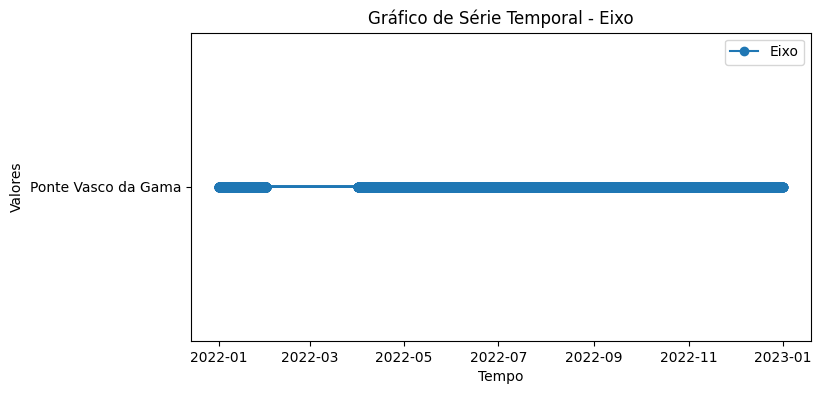

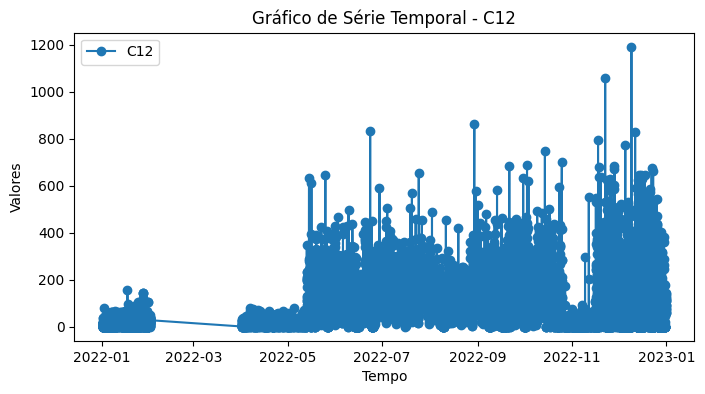

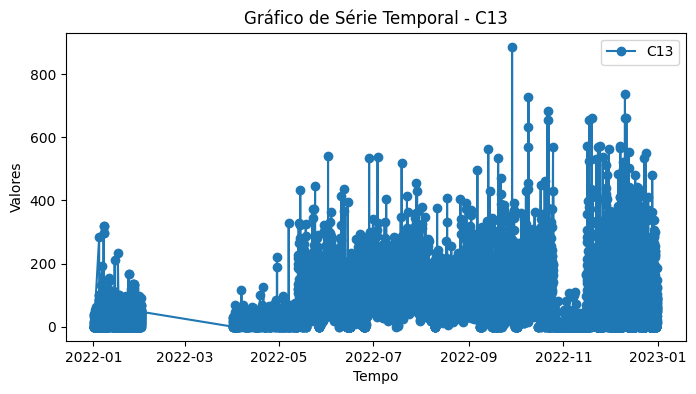

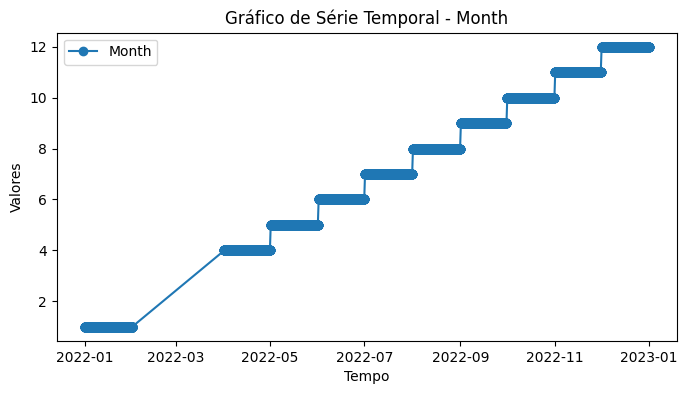

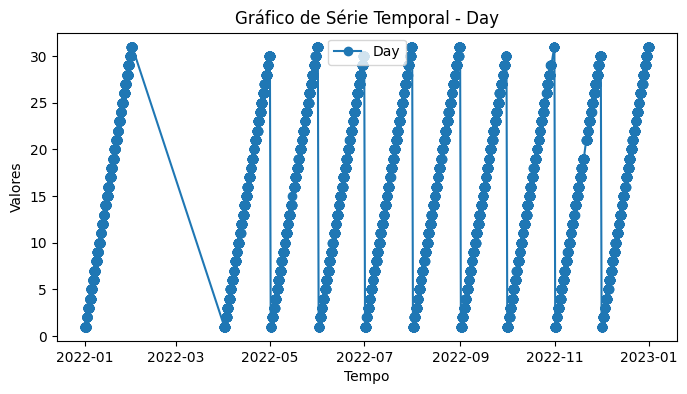

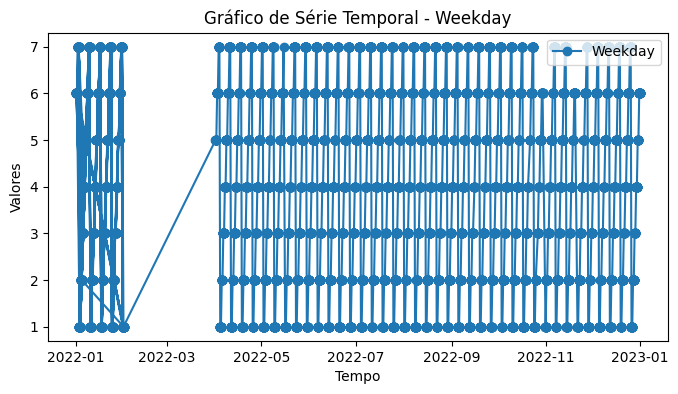

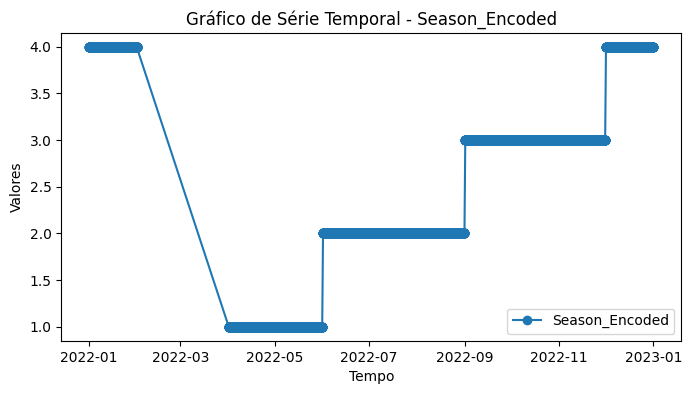

In [11]:
for column in df_vascodagama.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(df_vascodagama.index, df_vascodagama[column], marker='o', linestyle='-', label=column)
    plt.title(f'Gráfico de Série Temporal - {column}')
    plt.xlabel('Tempo')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()

In [ ]:

"""
dt_features = data_vodafone_eixos[['Month','Day','C12','C13','Weekday','Season_Encoded']]
dt_target = data_vodafone_eixos['C13']

scaler_features = StandardScaler()
scaler_target = StandardScaler()

features_scaled = scaler_features.fit_transform(dt_features)
target_scaled = scaler_target.fit_transform(dt_target.values.reshape(-1, 1))

#4Amostras por hora

timesteps = 12;

X = []

y = []

for i in range(len(features_scaled) - timesteps):
  X.append(features_scaled[i:i + timesteps])
  y.append(target_scaled[i + timesteps])


X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(timesteps, features_scaled.shape[1])))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)
"""

In [ ]:
###TESTE 2

In [ ]:
df = data_vodafone_eixos[data_vodafone_eixos['Eixo']== 'Ponte Vasco da Gama']
df = df.drop(columns='Eixo')
df=df.set_index('Datetime')
print(df.head())

                             C12    C13  Month  Day  Weekday  Season_Encoded
Datetime                                                                    
2022-01-01 08:25:00+00:00  10.69  10.69      1    1        6               4
2022-01-01 08:30:00+00:00   0.00   0.00      1    1        6               4
2022-01-01 08:35:00+00:00  23.17   0.00      1    1        6               4
2022-01-01 09:10:00+00:00  13.47  12.14      1    1        6               4
2022-01-01 08:45:00+00:00   0.00   0.00      1    1        6               4


In [ ]:
dataset = df
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

<Axes: xlabel='Datetime'>

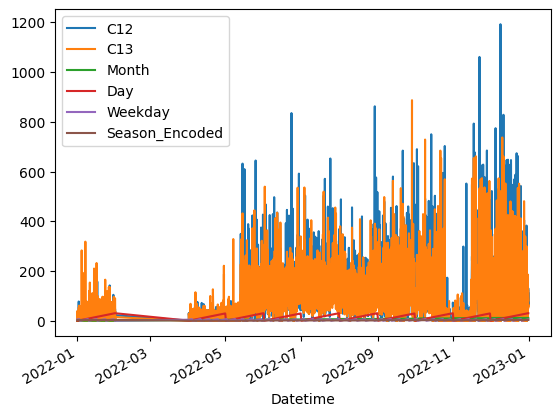

In [ ]:
df.plot()

In [ ]:
"""
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
"""

In [ ]:
"""
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

  # reshape into X=t and Y=t+1
look_back = 672
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
"""

(6223, 672)


In [ ]:
"""
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
"""

In [ ]:
"""
from keras.layers import Dropout
from keras.layers import Bidirectional
model=Sequential()
model.add(LSTM(20,activation='relu',return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(20, activation='sigmoid', return_sequences=False))
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
"""

In [ ]:
"""
Xdata_train=[]
Ydata_train=[]

Xdata_train, Ydata_train = create_dataset(train, look_back)
Xdata_train = np.reshape(Xdata_train, (Xdata_train.shape[0], Xdata_train.shape[1], 1))

#training for all data
history = model.fit(Xdata_train,Ydata_train,batch_size=1,epochs=10,shuffle=False)
"""

In [ ]:
"""
#predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
""

In [ ]:

"""
# Plot training predictions
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Plot test predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Train','Train Predict','Test Predict'],loc='best')
plt.show()
"""

In [ ]:
##USING THE model to predict the next DAY
"""
look_back = 96
#Creating future dates
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,look_back+1) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

pred_list = []
batch = train[-look_back:].reshape((1, look_back, 1))
for i in range(look_back):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-look_back:].index, columns=['Prediction'])
df_proj = pd.concat([df,df_predict], axis=1)

plt.figure(figsize=(20, 10))
plt.plot(df_proj.index, df_proj['C13'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(['Actual','Predictions'],loc='best')
plt.xlabel('Date')
plt.ylabel('Numero de pessoas no na proxima hora')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
"""

In [28]:
df_final = data_vodafone_eixos[data_vodafone_eixos['Eixo']== 'Ponte Vasco da Gama']
df_final.set_index('Datetime', inplace=True)

In [29]:
df_final = df_final[['Month','Day','C12','C13','Weekday','Season_Encoded']]

In [50]:
df_final = df_final[['C12','C13']]

In [52]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_final)

#define sequyence lenght and features

sequence_lenght = 384
num_features = len(df_final.columns)


sequences = []
labels = []

for i in range(len(scaled_data)- sequence_lenght):
    seq = scaled_data[i:i+sequence_lenght]
    label = scaled_data[i+sequence_lenght][1]
    sequences.append(seq)
    labels.append(label)


sequences = np.array(sequences)
labels = np.array(labels)

#Train test split

train_size = int(0.8* len(sequences))
train_x , test_x = sequences[:train_size], sequences[train_size:]
train_y , test_y = labels[:train_size], labels[train_size:]

print("Train X shape", train_x.shape)
print("Train Y shape", train_y.shape)
print("Test x shape", test_x.shape)
print("Test y shape", test_y.shape)

Train X shape (6589, 384, 2)
Train Y shape (6589,)
Test x shape (1648, 384, 2)
Test y shape (1648,)


In [53]:
#Create the model

model = Sequential()

#Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))

#Add output layer
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 384, 128)          67072     
                                                                 
 dropout_18 (Dropout)        (None, 384, 128)          0         
                                                                 
 lstm_21 (LSTM)              (None, 384, 64)           49408     
                                                                 
 dropout_19 (Dropout)        (None, 384, 64)           0         
                                                                 
 lstm_22 (LSTM)              (None, 384, 32)           12416     
                                                                 
 dropout_20 (Dropout)        (None, 384, 32)           0         
                                                                 
 dense_6 (Dense)             (None, 384, 1)           

In [55]:
#Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Hist = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
)

Epoch 1/100
83/83 [==============================] - 86s 55ms/step - loss: 0.0072 - val_loss: 0.0173
Epoch 2/100
83/83 [==============================] - 3s 40ms/step - loss: 0.0070 - val_loss: 0.0177
Epoch 3/100
83/83 [==============================] - 3s 42ms/step - loss: 0.0069 - val_loss: 0.0179
Epoch 4/100
83/83 [==============================] - 4s 53ms/step - loss: 0.0070 - val_loss: 0.0166
Epoch 5/100
83/83 [==============================] - 3s 40ms/step - loss: 0.0069 - val_loss: 0.0167
Epoch 6/100
83/83 [==============================] - 3s 40ms/step - loss: 0.0069 - val_loss: 0.0159
Epoch 7/100
83/83 [==============================] - 3s 41ms/step - loss: 0.0069 - val_loss: 0.0154
Epoch 8/100
83/83 [==============================] - 4s 51ms/step - loss: 0.0069 - val_loss: 0.0163
Epoch 9/100
83/83 [==============================] - 3s 40ms/step - loss: 0.0069 - val_loss: 0.0157
Epoch 10/100
83/83 [==============================] - 3s 40ms/step - loss: 0.0069 - val_loss: 0.016

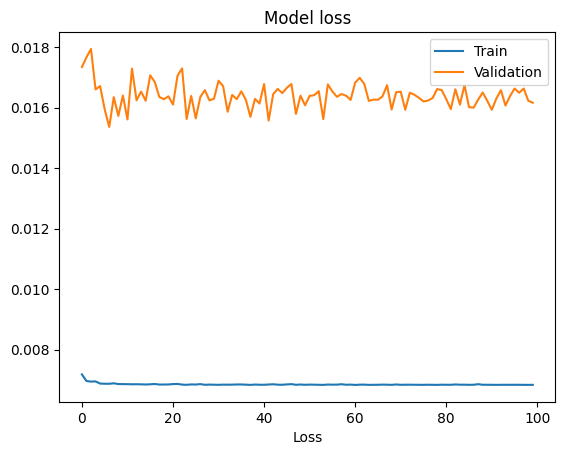

In [56]:
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.xlabel('Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error


predictions = model.predict(test_x)
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("MAE",mae)
print("MSE",mse)
print("RMSE", rmse)

52/52 [==============================] - 1s 17ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# y_true values

test_y_copies = np.repeat(test_y.reshape(-1,1), test_x.shape[-1], axis=1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

#predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

In [21]:
##SHAPEFILES IN PYTHON VIA GEOPANDAS (DEPOIS É PARA PASSAR PARA CIMA)




